In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [2]:
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
pd.pandas.set_option("display.max_columns",None)


In [3]:
train=pd.read_csv("creditcard.csv")
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
train.shape

(284807, 31)

In [5]:
train.isnull().values.any()

False

In [6]:
train.nunique()

Time      124592
V1        275653
V2        275655
V3        275657
V4        275654
V5        275657
V6        275652
V7        275651
V8        275643
V9        275656
V10       275646
V11       275648
V12       275654
V13       275657
V14       275653
V15       275653
V16       275645
V17       275646
V18       275655
V19       275645
V20       275632
V21       275617
V22       275644
V23       275611
V24       275645
V25       275640
V26       275647
V27       275597
V28       275558
Amount     32767
Class          2
dtype: int64

In [7]:
# Visualiziang The Target Result #

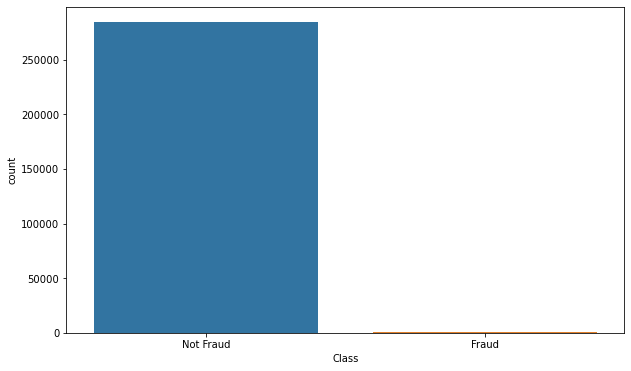

In [8]:
plt.figure(figsize=(10,6))
g = sns.countplot(train['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

In [ ]:
# This plot shows it is highly unbalanced as most of the features are non_fraud # 

In [ ]:
# Visualizing the Amount # 

<AxesSubplot:xlabel='Amount', ylabel='Count'>

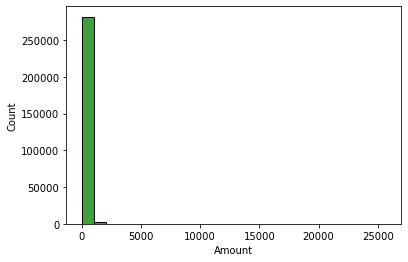

In [9]:
sns.histplot(train['Amount'],bins=25,color="green")

<AxesSubplot:xlabel='log_Amount', ylabel='Count'>

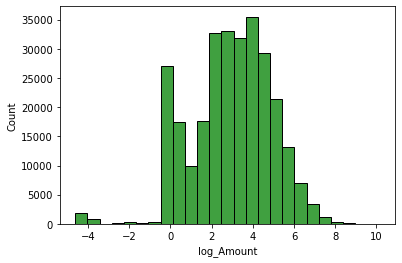

In [10]:
train['log_Amount'] = train['Amount'].apply(lambda x: np.log(x + 0.01))
sns.histplot(train['log_Amount'],bins=25,color="green")

In [ ]:
# Visualizing The Outliers in amount # 

Text(0, 0.5, 'log_Amount')

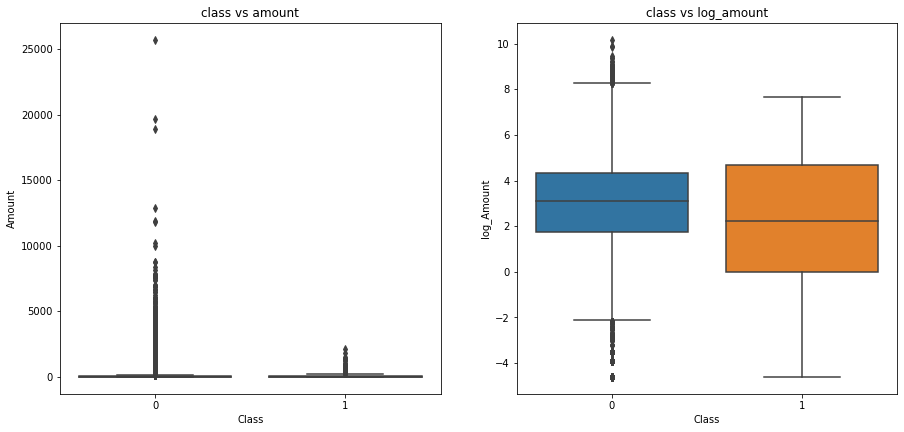

In [11]:
plt.figure(figsize=(15,15))
plt.subplot(221)
ax1=sns.boxplot(x=train['Class'],y=train['Amount'],data=train)
ax1.set_title("class vs amount")
ax1.set_xlabel("Class")
ax1.set_ylabel("Amount")

plt.subplot(222)
ax1=sns.boxplot(x=train['Class'],y=train['log_Amount'],data=train)
ax1.set_title("class vs log_amount")
ax1.set_xlabel("Class")
ax1.set_ylabel("log_Amount")

In [ ]:
# Scaling the data # 

In [12]:
# robust scaler
scaler=RobustScaler()
train['scaled_Amount']=scaler.fit_transform(train['log_Amount'].values.reshape(-1, 1))
train['scaled_time']=scaler.fit_transform(train['Time'].values.reshape(-1, 1))

<AxesSubplot:xlabel='scaled_Amount', ylabel='Count'>

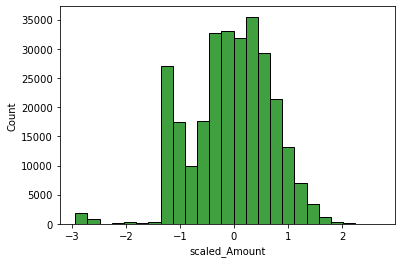

In [14]:
sns.histplot(train['scaled_Amount'],bins=25,color="green")

<AxesSubplot:xlabel='scaled_time', ylabel='Count'>

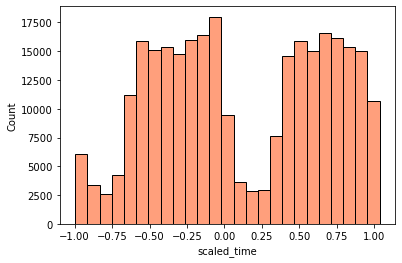

In [15]:
sns.histplot(train['scaled_time'],bins=25,color="coral")

In [ ]:
# Preparing the Dataset for analysis #

In [16]:
class_count_0, class_count_1 = train['Class'].value_counts()
class_0 = train[train['Class'] == 0]
class_1 = train[train['Class'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (284315, 34)
class 1: (492, 34)


In [17]:
fraud_df=train[train['Class']==1]
non_fraud_df=train[train['Class']==0]
fraud_df.shape, non_fraud_df.shape

((492, 34), (284315, 34))

In [18]:
train.drop(['Time','Amount','log_Amount'], axis=1, inplace=True)

In [19]:
scaled_amount = train['scaled_Amount']
scaled_time = train['scaled_time']

train.drop(['scaled_Amount', 'scaled_time'], axis=1, inplace=True)
train.insert(0, 'scaled_Amount', scaled_amount)
train.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

train.head()

,scaled_Amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.731127,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.800391,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.085310,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.657947,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.441346,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
# Heatmap # 

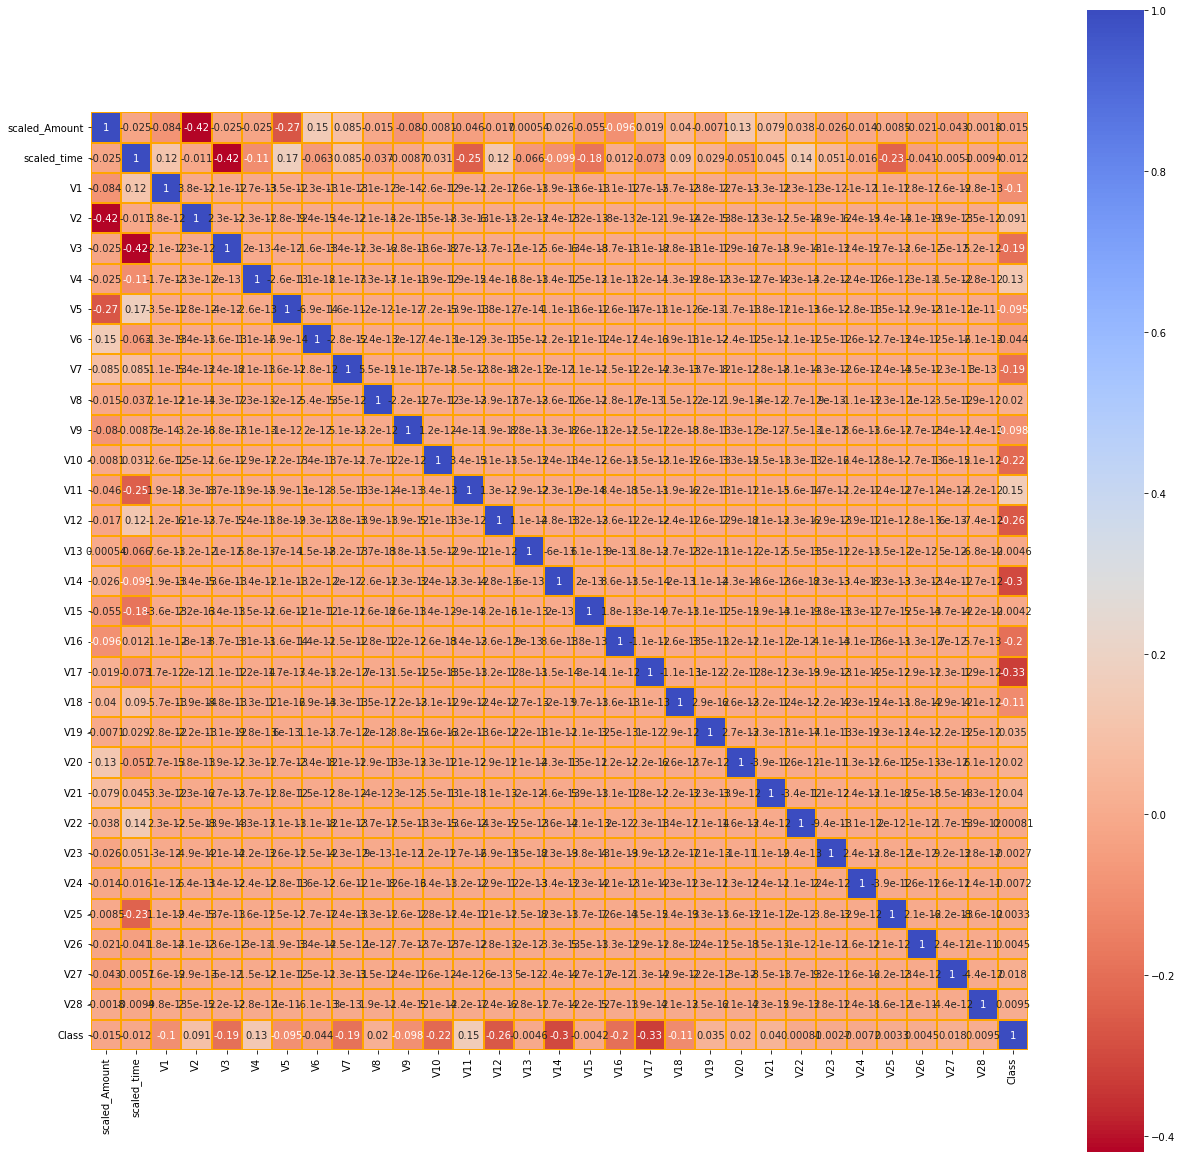

In [21]:
colormap = 'coolwarm_r'

plt.figure(figsize=(21,21))

sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap = colormap, linecolor='orange', annot=True)
plt.show()

In [22]:
# This shows: Negatively Correlated= V3,V7,V10,V12,V14,V17 and Positively Correlated= V2,V4,V11,V19 Features # 

In [ ]:
# Ways Of handling Unbalanced Datset # 

In [23]:
y=train['Class']
train.drop(['Class'],axis=1,inplace=True)

In [24]:
# train test split of the dataset
x_train,x_test,y_train,y_test=train_test_split(train,y,test_size=0.2,random_state=42)

In [ ]:
# Random Over sampler #

In [25]:
# random over sampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(x_train, y_train)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 227451, 1: 227451})


In [26]:
# Visualize The change # 

<AxesSubplot:xlabel='Class', ylabel='count'>

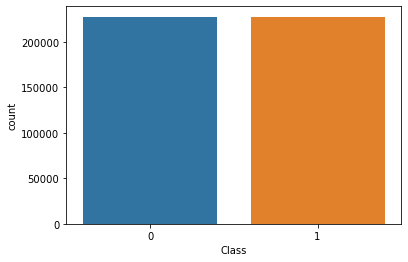

In [27]:
sns.countplot(y_ros)

In [28]:
# Random Under sampler # 

In [29]:
# Random under sampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(random_state=42)

# fit predictor and target variable
x_rus, y_rus = ros.fit_resample(x_train, y_train)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 394, 1: 394})


<AxesSubplot:xlabel='Class', ylabel='count'>

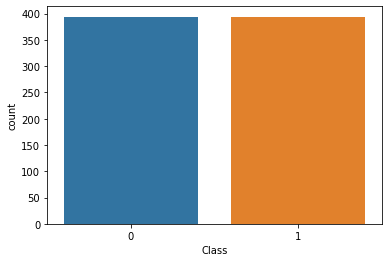

In [30]:
sns.countplot(y_rus)